In [1]:
import pandas as pd
from datasource.price import get_historical
import matplotlib.pyplot as plt

from feature_util.ohlc import CCIFeatureProducer
from feature_util.ohlc import SimpleMovingAverageFeatureProducer
from feature_util.ohlc import ExponentialMovingAverageFeatureProducer
from feature_util.ohlc import TypicalPriceFeatureProducer
from feature_util.ohlc import MACDFeatureProducer

In [2]:
symbol = 'AAPL'

In [3]:
df = get_historical(symbol, '2018-1-1', '2018-5-25')

In [4]:
df

,close,high,low,open,volume
2018-01-02,170.907388,170.947074,167.930945,168.823878,25048048
2018-01-03,170.877624,173.179407,170.609744,171.175268,28819653
2018-01-04,171.671342,172.107887,170.728801,171.185189,22211345
2018-01-05,173.625873,173.992968,171.691185,172.078123,23016177
2018-01-08,172.980977,174.231083,172.564275,172.980977,20134092
2018-01-09,172.961134,173.685402,172.048358,173.179407,21262614
2018-01-10,172.921448,172.931370,171.641577,171.800321,23589129
2018-01-11,173.903675,174.110637,173.119878,173.219093,17523256
2018-01-12,175.699462,175.967342,174.270769,174.796608,25039531
2018-01-16,174.806529,177.981402,174.756922,176.503102,29159005


In [5]:
cci_producer = CCIFeatureProducer(period=20, abs_threshold=None)
feat_df = cci_producer.produce(df)

sma_producer = SimpleMovingAverageFeatureProducer(period=20)
ema_producer = ExponentialMovingAverageFeatureProducer(period=20)

feat_df = sma_producer.produce(feat_df)
feat_df = ema_producer.produce(feat_df)

tp_producer = TypicalPriceFeatureProducer()
feat_df = tp_producer.produce(feat_df)

macd_producer = MACDFeatureProducer()
feat_df = macd_producer.produce(feat_df)

In [6]:
feat_df

,close,high,low,open,volume,cci,close_sma_20,close_ema_20,tp,macd,macd_signal,macd_hist
2018-01-02,170.907388,170.947074,167.930945,168.823878,25048048,NaN,NaN,170.907388,169.928469,0.000000,0.000000,0.000000
2018-01-03,170.877624,173.179407,170.609744,171.175268,28819653,NaN,NaN,170.891762,171.555591,-0.000668,-0.000371,-0.000297
2018-01-04,171.671342,172.107887,170.728801,171.185189,22211345,NaN,NaN,171.178019,171.502677,0.023762,0.009520,0.014243
2018-01-05,173.625873,173.992968,171.691185,172.078123,23016177,NaN,NaN,171.884677,173.103342,0.104859,0.041816,0.063043
2018-01-08,172.980977,174.231083,172.564275,172.980977,20134092,NaN,NaN,172.149862,173.258778,0.121056,0.065388,0.055668
2018-01-09,172.961134,173.685402,172.048358,173.179407,21262614,NaN,NaN,172.321004,172.898298,0.127669,0.082270,0.045399
2018-01-10,172.921448,172.931370,171.641577,171.800321,23589129,NaN,NaN,172.434533,172.498132,0.127913,0.093821,0.034092
2018-01-11,173.903675,174.110637,173.119878,173.219093,17523256,NaN,NaN,172.688481,173.711396,0.172734,0.112785,0.059949
2018-01-12,175.699462,175.967342,174.270769,174.796608,25039531,NaN,NaN,173.171457,175.312525,0.290239,0.153778,0.136461
2018-01-16,174.806529,177.981402,174.756922,176.503102,29159005,NaN,NaN,173.417685,175.848284,0.323377,0.191778,0.131599


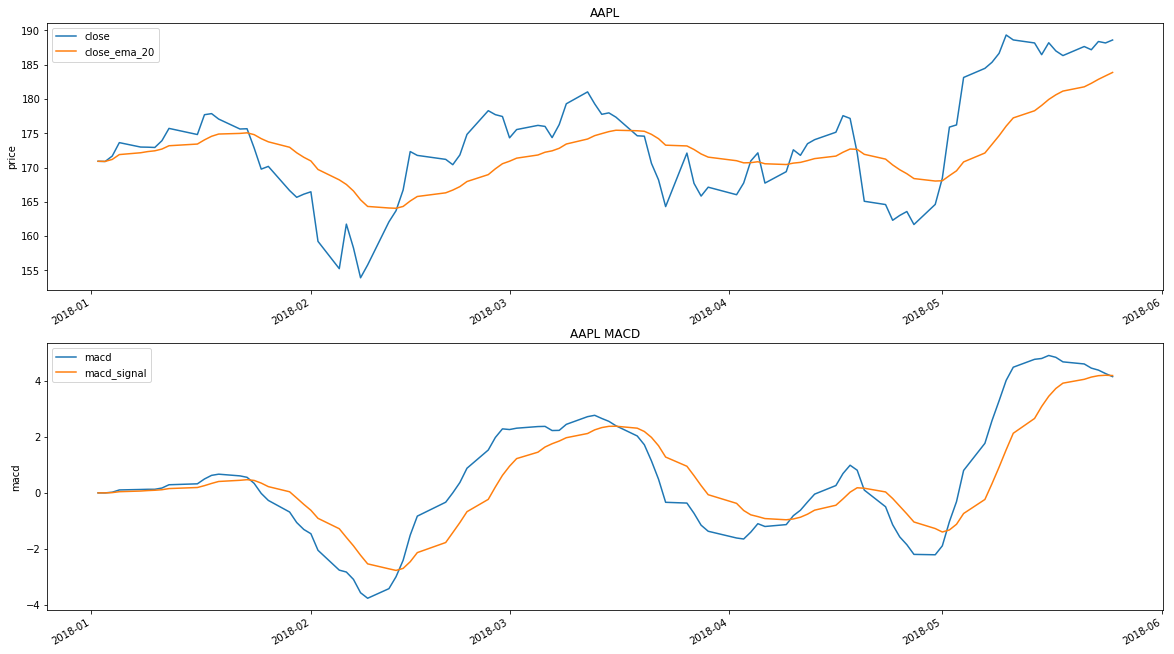

In [9]:
plt.figure(figsize=(20,12))

plt.figure(1)
plt.subplot(211)
feat_df['close'].plot(legend=True)
feat_df['close_ema_20'].plot(legend=True)
plt.ylabel('price')
plt.title(symbol)

# plot CCI
"""
plt.subplot(212)
fig = feat_df['cci'].fillna(0).plot()
plt.axhline(y=100, color='g', linestyle='-')
plt.axhline(y=-100, color='g', linestyle='-')
plt.ylabel('cci')
plt.title(symbol + ' cci')
plt.show()
"""

# plot MACD
plt.subplot(212)
feat_df['macd'].plot(legend=True)
feat_df['macd_signal'].plot(legend=True)
plt.ylabel('macd')
plt.title(symbol + ' MACD')
plt.show()

## Strategy with CCI

In [19]:
def cci_strategy_return(df, threshold, period, debug=False):
    
    def get_cci_trade_point(df):
        trades = []
        previous_cci = 0
        state = 'neutral'
        for index, row in df.iterrows():
            if row['cci'] > threshold and row['cci'] < previous_cci and state != 'overbought':
                state = 'overbought'
                trades.append((index, 'sell', row['close']))
            elif row['cci'] < -threshold and row['cci'] > previous_cci and state != 'oversold':
                state = 'oversold'
                trades.append((index, 'buy', row['close']))
            previous_cci = row['cci']
        
        return trades
    
    def cal_trade_return(trades):
        r = 1
        i = 1
        
        if len(trades) == 0:
            return r
    
        if trades[0][1] == 'sell':
            trades = trades[1:]
        
        while i <= len(trades) - 1:
            diff = 1.0 * (trades[i][2] / trades[i - 1][2])
            r *= diff
            i += 2
        
        return r
    
    cci_producer = CCIFeatureProducer(period=period, abs_threshold=None)
    feat_df = cci_producer.produce(df)

    trades = get_cci_trade_point(feat_df)
    if debug:
        if len(trades) == 0:
            print 'No trades happened'
        for t in trades:
            print(t)
        
    return cal_trade_return(trades)

In [20]:
symbols = ['MCHP', 'FOX', 'FOXA', 'CA', 'ALGN', 'CHKP']
start = '2018-1-1'
end = '2018-5-12'
threshold = 100
period = 20

In [21]:
print('CCI strategy return between %s and %s' % (start, end))

def get_return(s):
    df = get_historical(s, start, end)
    cci_return = cci_strategy_return(df, threshold, period, True)
    static_return = 1.0 * df['close'].values[-1] / df['close'].values[0]
    return {'cci_return': cci_return, 'static_return': static_return}

returns = [get_return(s) for s in symbols]
result = pd.DataFrame(data=returns, index=symbols)
result

CCI strategy return between 2018-1-1 and 2018-5-12
No trades happened
(Timestamp('2018-04-04 00:00:00'), 'buy', 35.67)
(Timestamp('2018-04-18 00:00:00'), 'sell', 36.82)
(Timestamp('2018-04-04 00:00:00'), 'buy', 36.14)
(Timestamp('2018-04-18 00:00:00'), 'sell', 37.31)
(Timestamp('2018-03-12 00:00:00'), 'sell', 36.81)
(Timestamp('2018-03-26 00:00:00'), 'buy', 34.15)
(Timestamp('2018-04-03 00:00:00'), 'buy', 243.62)
(Timestamp('2018-03-26 00:00:00'), 'buy', 100.85)


,cci_return,static_return
MCHP,1.000000,1.032492
FOX,1.032240,1.065132
FOXA,1.032374,1.063094
CA,1.000000,1.059548
ALGN,1.000000,1.275443
CHKP,1.000000,0.965886


In [11]:
cci_strategy_return(get_historical('BXP', start, end), debug=True)

TypeError: cci_strategy_return() takes at least 3 arguments (2 given)